In [106]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [107]:
NEURAL_NETWORKS = ['DenseNet201', 'MobileNetV2', 'InceptionV3', "ResNet50"]
path_project = Path().absolute().parent.parent.parent
results_path = path_project / "6_resultados"


In [108]:
main_pd = pd.DataFrame()
pds = []
for network in NEURAL_NETWORKS:
    output_file = results_path / 'analitycs' / 'by_train' / '_pre_plot' / f'{network}_result_for_analytic.csv'
    readed = pd.read_csv(output_file)
    pds.append(readed)

main_pd = pd.concat(pds)

In [109]:
def makedatFile(network, attribute, x, y):
  f = open(results_path / 'analitycs' / 'by_train' / '_pre_plot' / 'dats' /f"{network}_{attribute}.dat", "w+")
  f.write("x F(x)\n")
  for i, axisx in enumerate(x):
     f.write(f"{axisx} {y[i]}\n")

        

In [110]:
main_pd

,subset,model,runtime,val_runtime,total_runtime,accuracy_mean,accuracy_median,accuracy_lower,accuracy_upper,accuracy_lower_whisker,...,val_npv_lower,val_npv_upper,val_npv_lower_whisker,val_npv_upper_whisker,val_mcc_mean,val_mcc_median,val_mcc_lower,val_mcc_upper,val_mcc_lower_whisker,val_mcc_upper_whisker
0,5,DenseNet201,280.643584,21.313709,301.957292,88.970499,89.120725,88.603845,89.507118,87.248936,...,88.133702,89.650129,85.859061,91.924769,77.908019,78.168240,76.256460,79.326965,71.650703,83.932722
1,10,DenseNet201,285.591305,20.736673,306.327978,92.279468,92.424217,91.860193,92.935079,90.247864,...,91.085295,92.136776,89.508074,93.713998,83.225301,83.279902,82.208636,84.141460,79.309401,87.040696
2,15,DenseNet201,252.470955,20.218766,272.689721,94.174657,94.386494,93.465680,94.962670,91.220195,...,92.236672,93.456696,90.406637,95.286731,85.831933,85.782486,84.708303,87.010038,81.255701,90.462640
3,20,DenseNet201,237.816697,19.481501,257.298198,95.789815,95.967811,94.663550,96.930285,91.263448,...,93.452623,94.506344,91.872042,96.086925,88.085852,88.102236,87.068547,89.065021,84.073836,92.059732
4,25,DenseNet201,235.830205,18.751458,254.581663,97.233779,97.551546,96.322472,98.444179,93.139913,...,94.726448,95.380855,93.744837,96.362465,90.034286,90.106604,89.345516,90.792887,87.174460,92.963943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,80,ResNet50,160.822083,3.720533,164.542617,94.208012,95.570540,93.392019,96.231437,89.132892,...,84.655996,95.796095,67.945847,112.506244,74.260442,89.670703,71.503009,91.550815,41.431300,121.622524
16,85,ResNet50,160.077265,3.695955,163.773221,94.077561,95.372868,93.592644,96.265227,89.583769,...,88.675974,95.834604,77.938030,106.572548,75.481290,88.585946,73.739615,91.585755,46.970405,118.354966
17,90,ResNet50,157.614939,3.636831,161.251770,94.106954,95.467934,92.934553,96.517862,87.559590,...,89.079115,95.999244,78.698921,106.379437,76.208812,89.498752,77.439253,92.017241,55.572271,113.884223
18,95,ResNet50,153.136700,3.561598,156.698299,94.309614,95.341691,93.582986,96.277566,89.541116,...,80.323865,95.728016,57.217637,118.834243,72.261662,86.834559,60.440390,91.416968,13.975522,137.881836


In [111]:
# valores maximos e minos das acuracias
main_pd['accuracy_median'].max()
main_pd['accuracy_median'].min()

81.92686140537262

In [112]:

# Combinando todos os valores de ROIs
full_rois = np.unique(np.concatenate([main_pd['subset']]))
range_rois =  np.arange(5, 100, 10)


In [113]:
def plot_comparison(main_pd, attribute, title, xlabel, xticks, figsize=(10, 6), yticks=None):
    """
    Função para plotar comparações de um atributo específico entre diferentes arquiteturas de CNN.

    :param main_pd: DataFrame contendo todos os dados.
    :param attribute: Atributo a ser plotado (string).
    :param title: Título do gráfico.
    :param xlabel: Rótulo do eixo X.
    :param xticks: Marcas do eixo X.
    :param figsize: Tamanho da figura do gráfico.
    :param yticks: Marcas do eixo Y (opcional).
    """
    plt.figure(figsize=figsize)

    for network in NEURAL_NETWORKS:
        network_data = main_pd[main_pd['model'] == network]
        x = network_data['subset']
        y = network_data[attribute]
        plt.plot(x, y, marker='o', linestyle='-', label=network)
        print(network)
        makedatFile(network, attribute, x, y)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(attribute.replace('_', ' ').capitalize())
    plt.xticks(xticks)
    if yticks is not None:
        plt.yticks(yticks)
    plt.grid(True)
    plt.legend()
    plt.show()

    

DenseNet201
MobileNetV2
InceptionV3
ResNet50


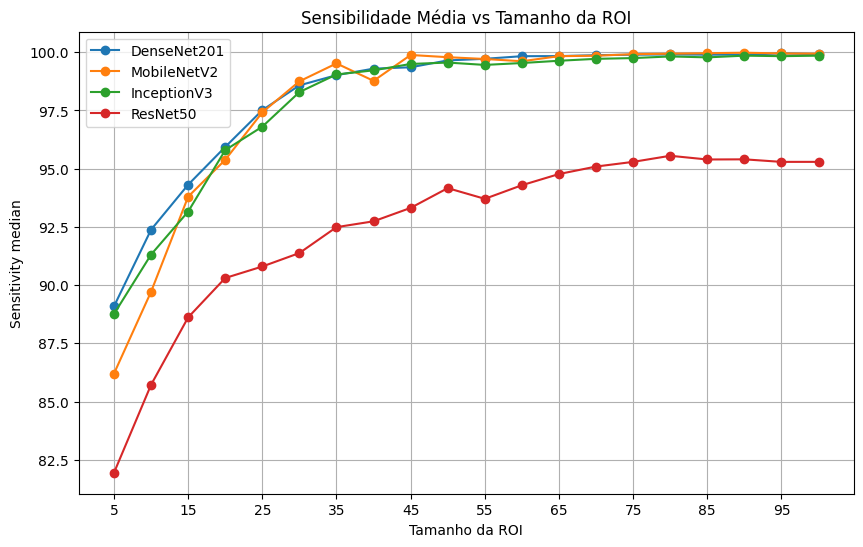

In [114]:
plot_comparison(main_pd, 'sensitivity_median', 'Sensibilidade Média vs Tamanho da ROI', 'Tamanho da ROI', range_rois)

DenseNet201
MobileNetV2
InceptionV3
ResNet50


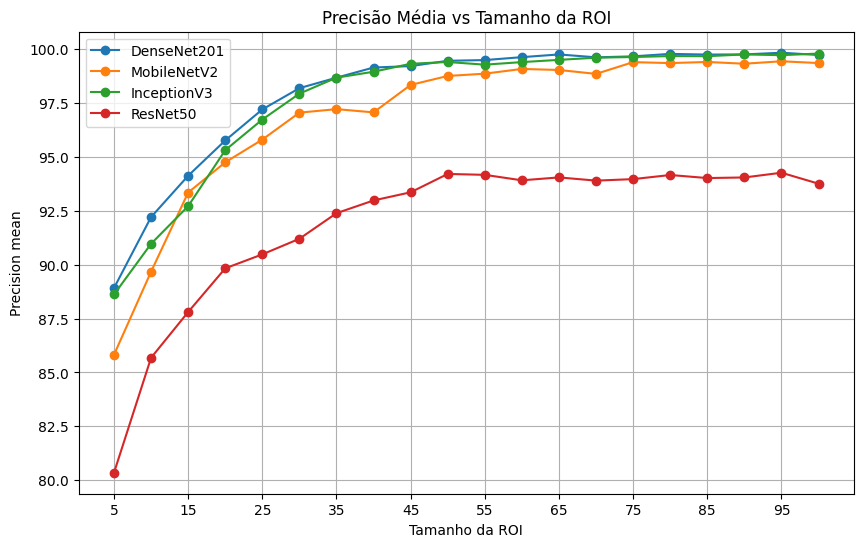

In [115]:
plot_comparison(main_pd, 'precision_mean', 'Precisão Média vs Tamanho da ROI', 'Tamanho da ROI', range_rois)

DenseNet201
MobileNetV2
InceptionV3
ResNet50


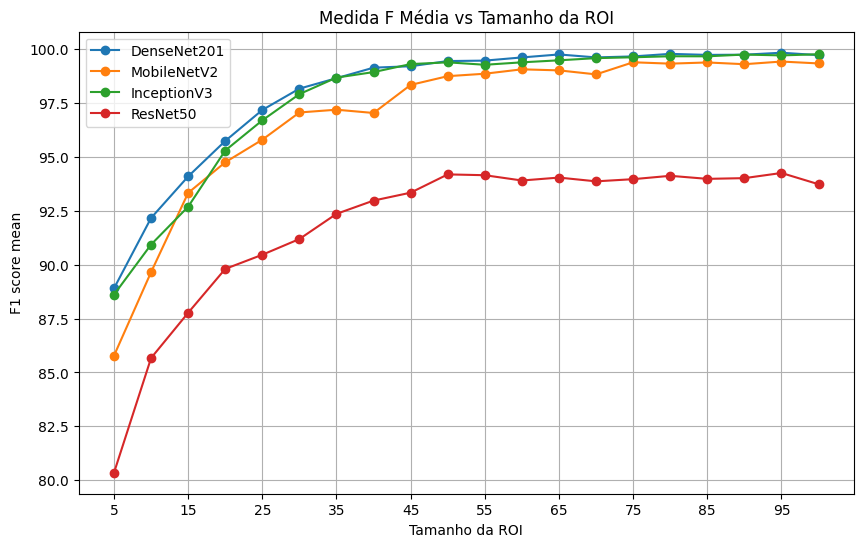

In [116]:
plot_comparison(main_pd, 'f1_score_mean', 'Medida F Média vs Tamanho da ROI', 'Tamanho da ROI', range_rois)


DenseNet201
MobileNetV2
InceptionV3
ResNet50


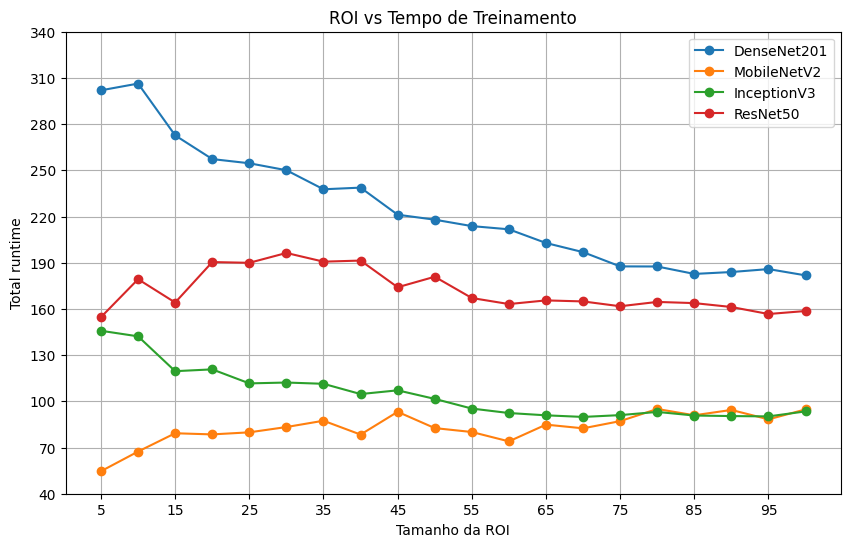

In [117]:
# Valores para os ticks do eixo Y
range_time = np.arange(40, 360, 30)

plot_comparison(main_pd, 'total_runtime', 'ROI vs Tempo de Treinamento', 'Tamanho da ROI', range_rois, yticks=range_time)


DenseNet201
MobileNetV2
InceptionV3
ResNet50


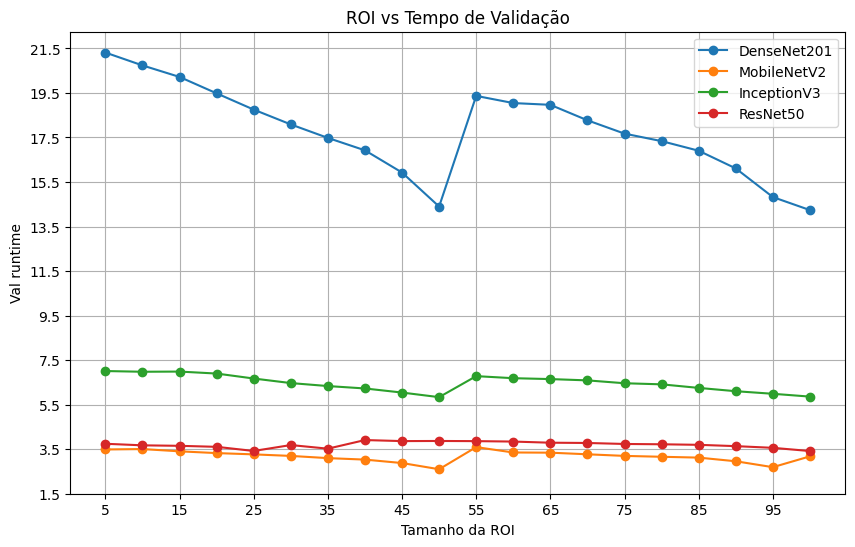

In [118]:
# Valores para os ticks do eixo Y ajustados para o tempo de validação
range_time_validation = np.arange(1.5, 23.5, 2)

plot_comparison(main_pd, 'val_runtime', 'ROI vs Tempo de Validação', 'Tamanho da ROI', range_rois, yticks=range_time_validation)


DenseNet201
MobileNetV2
InceptionV3
ResNet50


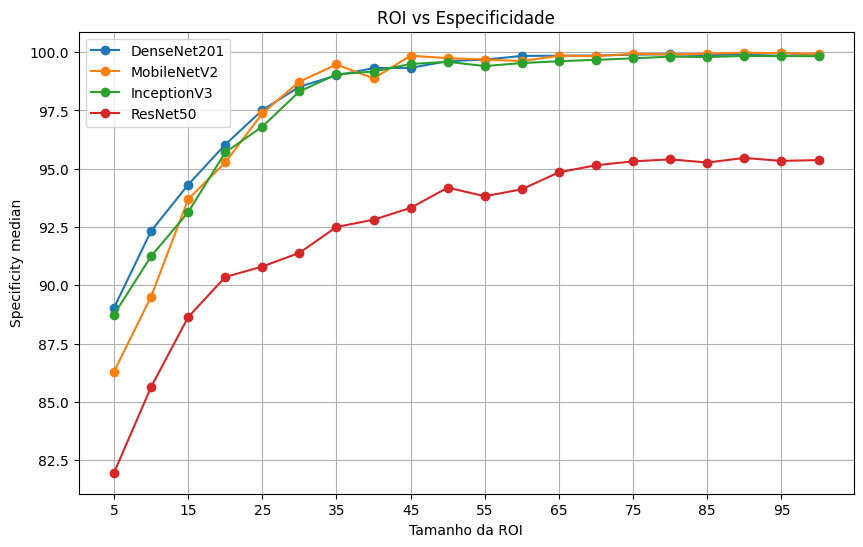

In [119]:

plot_comparison(main_pd, 'specificity_median', 'ROI vs Especificidade', 'Tamanho da ROI', range_rois)


DenseNet201
MobileNetV2
InceptionV3
ResNet50


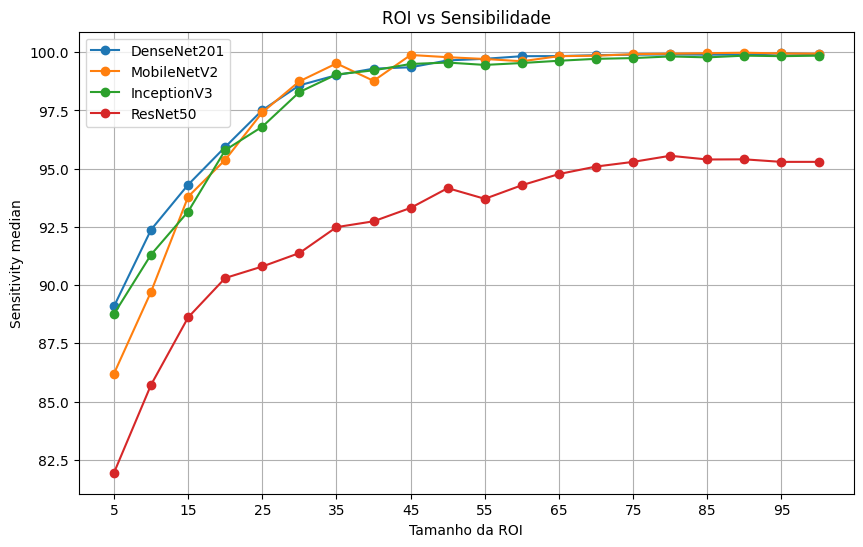

In [120]:

plot_comparison(main_pd, 'sensitivity_median', 'ROI vs Sensibilidade', 'Tamanho da ROI', range_rois)


DenseNet201
MobileNetV2
InceptionV3
ResNet50


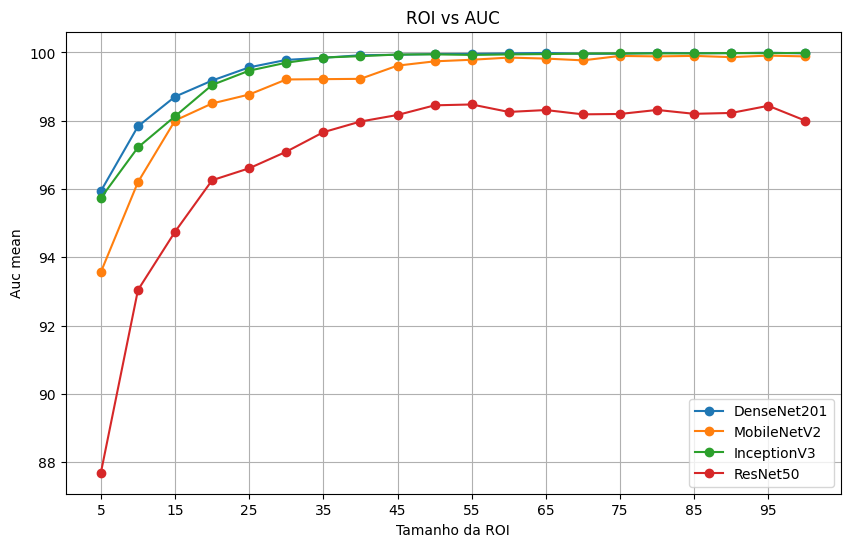

In [121]:
plot_comparison(main_pd, 'auc_mean', 'ROI vs AUC', 'Tamanho da ROI', range_rois)


DenseNet201
MobileNetV2
InceptionV3
ResNet50


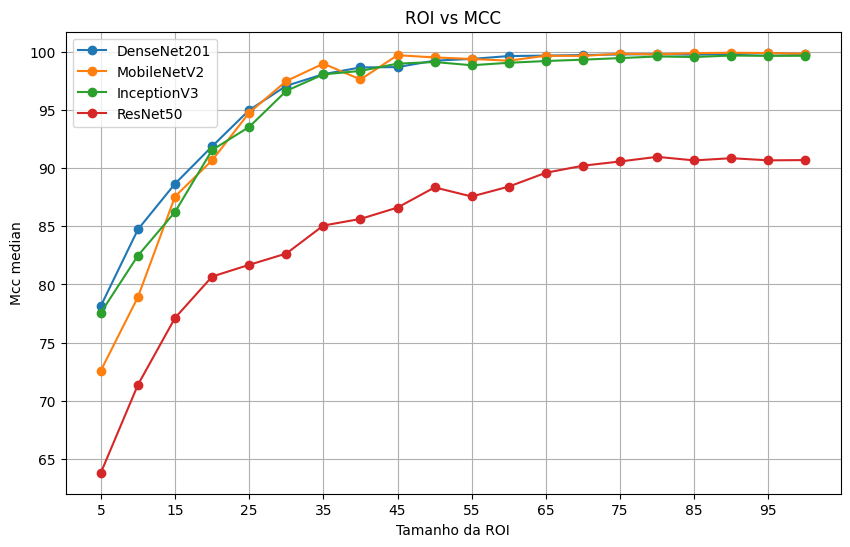

In [122]:
plot_comparison(main_pd, 'mcc_median', 'ROI vs MCC', 'Tamanho da ROI', range_rois)


DenseNet201
MobileNetV2
InceptionV3
ResNet50


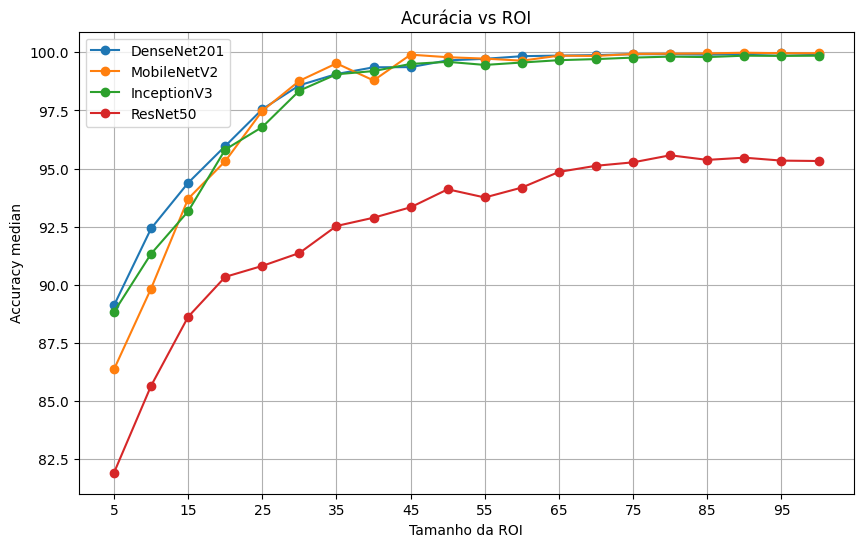

In [123]:
plot_comparison(main_pd, 'accuracy_median', 'Acurácia vs ROI', 'Tamanho da ROI', range_rois)

In [ ]:
#  Análise estatística (teste de hipótese)
#  hipotese: quero provar que a variação das ROI's influencia no desempenho e métricas dos modelos de redes neurais
#  hipotese nula (H0): as métricas de desempenho dos modelos de redes neurais são iguais entre cada subconjunto de dados (SUBSETS -> ROIS)
#  hipotese alternativa (H1): as métricas de desempenho dos modelos de redes neurais são diferentes entre cada subconjunto de dados (SUBSETS -> ROIS)
# alpha = 0.01, 1% de significância, de concluir que a hipótese nula é falsa quando ela é verdadeira.
# Valor-p (p-value)
## Se p-value < alpha: rejeita-se a hipótese nula (temos evidências suficientes para rejeitar a hipótese nula)
## Se p-value >= alpha: não rejeita-se a hipótese nula (não temos evidências suficientes para rejeitar a hipótese nula)
# Teste de hipótese: ranksums (teste de Mann-Whitney)

In [133]:
"""
Exemplo final do csv, os dados devem ser calculados em relação a 100% de ROI
model, roi_min, p_value_sensitivity, p_value_specificity, p_value_precision, p_value_f1_score, p_value_auc, p_value_mcc, p_value_accuracy  
"""
# for DenseNet201 in 85% ROI

import scipy.stats as stats
def test_hyphotesis(main_pd, roi):
    """
    Função para testar a hipótese nula de que as métricas de desempenho dos modelos de redes neurais são iguais entre cada subconjunto de dados (SUBSETS -> ROIS).
    em relação a 100% de ROI.
    :param main_pd: DataFrame contendo todos os dados.
    :param roi: Tamanho da ROI (int).
    """
    for network in NEURAL_NETWORKS:
        network_data = main_pd[main_pd['model'] == network]
        roi_data = network_data[network_data['subset'] == roi]
       
        p_value_sensitivity = stats.ranksums(roi_data['sensitivity_mean'], network_data[network_data['subset'] == 100]['sensitivity_mean']).pvalue
        p_value_specificity = stats.ranksums(roi_data['specificity_mean'], network_data[network_data['subset'] == 100]['specificity_mean']).pvalue
        p_value_precision = stats.ranksums(roi_data['precision_mean'], network_data[network_data['subset'] == 100]['precision_mean']).pvalue
        p_value_f1_score = stats.ranksums(roi_data['f1_score_mean'], network_data[network_data['subset'] == 100]['f1_score_mean']).pvalue
        p_value_auc = stats.ranksums(roi_data['auc_mean'], network_data[network_data['subset'] == 100]['auc_mean']).pvalue
        p_value_mcc = stats.ranksums(roi_data['mcc_mean'], network_data[network_data['subset'] == 100]['mcc_mean']).pvalue
        p_value_accuracy = stats.ranksums(roi_data['accuracy_mean'], network_data[network_data['subset'] == 100]['accuracy_mean']).pvalue

        print(f"{network}, {roi}, {p_value_sensitivity}, {p_value_specificity}, {p_value_precision}, {p_value_f1_score}, {p_value_auc}, {p_value_mcc}, {p_value_accuracy}")


test_hyphotesis(main_pd, 5)


DenseNet201, 5, 0.31731050786291415, 0.31731050786291415, 0.31731050786291415, 0.31731050786291415, 0.31731050786291415, 0.31731050786291415, 0.31731050786291415
MobileNetV2, 5, 0.31731050786291415, 0.31731050786291415, 0.31731050786291415, 0.31731050786291415, 0.31731050786291415, 0.31731050786291415, 0.31731050786291415
InceptionV3, 5, 0.31731050786291415, 0.31731050786291415, 0.31731050786291415, 0.31731050786291415, 0.31731050786291415, 0.31731050786291415, 0.31731050786291415
ResNet50, 5, 0.31731050786291415, 0.31731050786291415, 0.31731050786291415, 0.31731050786291415, 0.31731050786291415, 0.31731050786291415, 0.31731050786291415
